<a href="https://colab.research.google.com/github/techut30/Machine-learning-assignment-1/blob/main/Machine_Learning_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convergence reached after 10 iterations.
Final cost function value: 0.28090768615331674
Final learning parameter values (theta0, theta1): -2.4302950224654473e-15 0.6613090301045854


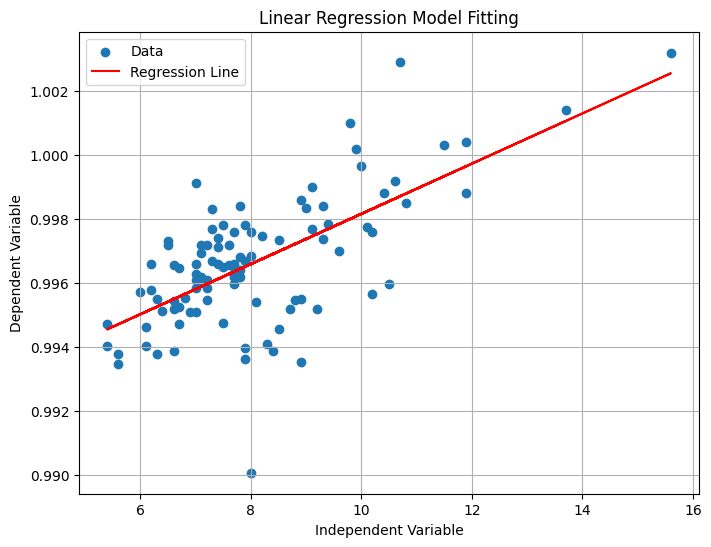

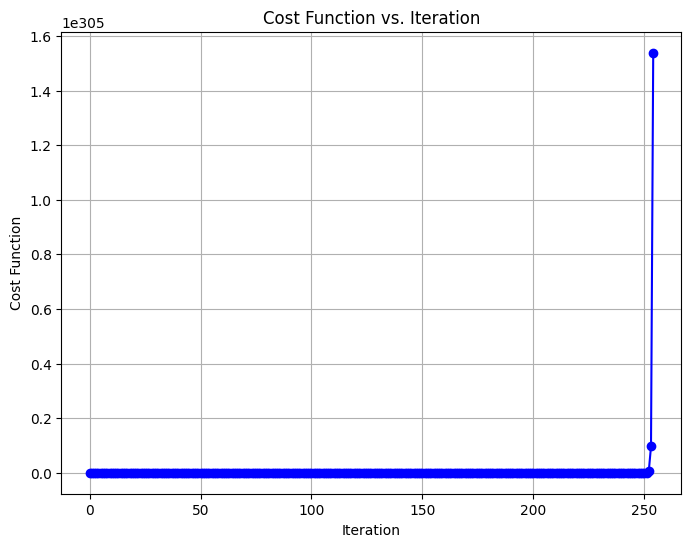

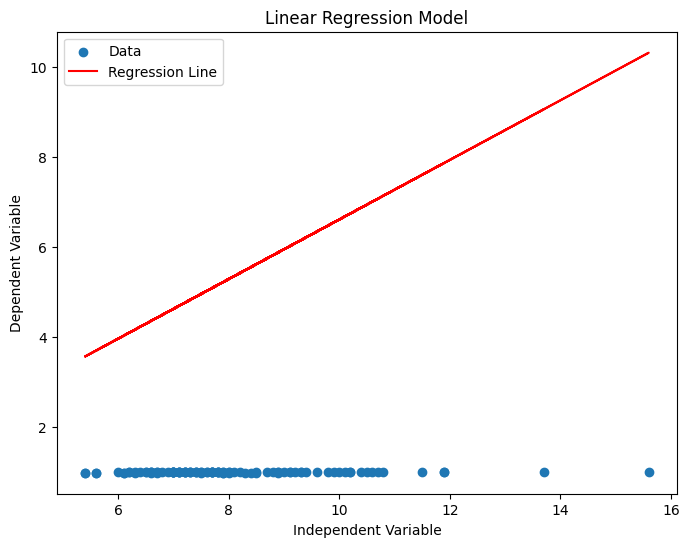

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


independent_data = pd.read_csv("linearX.csv")
dependent_data = pd.read_csv("linearY.csv")
X = independent_data.values.ravel()
y = dependent_data.values.ravel()


X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std


theta0 = 0
theta1 = 0
learning_rate = 0.5
iterations = 1000
convergence_threshold = 1e-6

def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

def cost_function(X, y, theta0, theta1):
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    squared_errors = (predictions - y) ** 2
    J = (1/(2*m)) * np.sum(squared_errors)
    return J

m = len(X_normalized)

previous_cost = cost_function(X_normalized, y_normalized, theta0, theta1)
for i in range(iterations):
    predictions = hypothesis(X_normalized, theta0, theta1)
    error = predictions - y_normalized

    dtheta0 = (1/m) * np.sum(error)
    dtheta1 = (1/m) * np.sum(error * X_normalized)

    theta0 -= learning_rate * dtheta0
    theta1 -= learning_rate * dtheta1
    current_cost = cost_function(X_normalized, y_normalized, theta0, theta1)

    if abs(current_cost - previous_cost) < convergence_threshold:
        print("Convergence reached after", i+1, "iterations.")
        break

    previous_cost = current_cost

print("Final cost function value:", current_cost)
print("Final learning parameter values (theta0, theta1):", theta0, theta1)

theta0_denormalized = (y_std * theta0) + y_mean - (theta1 * y_std * (X_mean / X_std))
theta1_denormalized = (theta1 * y_std) / X_std


plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, theta0_denormalized + theta1_denormalized * X, color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Model Fitting')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, hypothesis(X, theta0, theta1), color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Model')
plt.legend()
plt.show()